<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4

## Introduction:

Numpy shaping works like vector shaping, with the first dimension representing the number of rows, and the second dimension representing the number of columns.

See A [Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/)  for a nice guide to dimensions and other operations.



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

In [2]:
data = np.random.random((100, 2))
print(data.shape)

(100, 2)


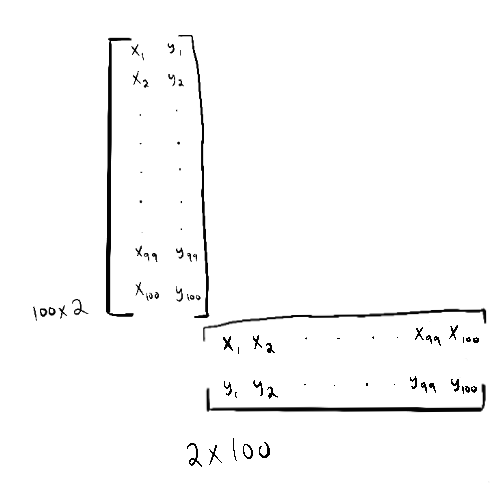

For the data we generated randomly, we can treat the first column as x values and the second column as y values in a scatter plot.

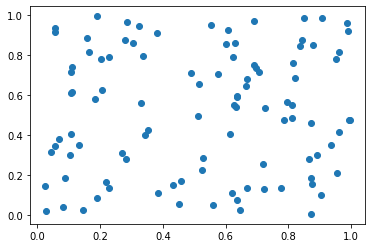

In [3]:
x = data[:, 0] # slicing to get the first column of data
y = data[:, 1] # slicing to get the second column of data

plt.scatter(x, y)
plt.show()

We could also reverse the order.

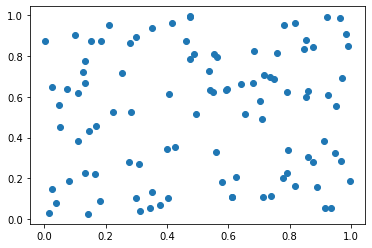

In [4]:
plt.scatter(y, x)
plt.show()

## Exercise 1: y=mx+b

### Exercise Question

Create a scatter plot where the data forms a single diagonal line from the top left to the bottom right corner. You can use numpy, but it can also be done without numpy. If you have any questions about the syntax of matplotlib, visit the [docs](https://matplotlib.org/stable/tutorials/introductory/usage.html).

Hint: create the plot using only the x values from the pre-lab examples.

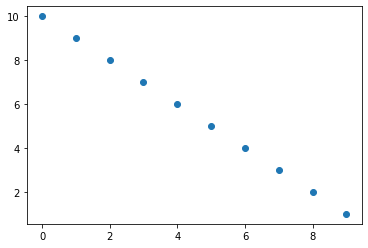

In [9]:
x = np.arange(10)
y = 10 - x

plt.scatter(x,y)
plt.show()

## Exercise 2: Flower Power

### Pre-Exercise Information

We can load in various datasets using statsmodels. The list of datasets available through statsmodels is [here](https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv).

In [10]:
df = sm.datasets.get_rdataset('iris').data
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can use seaborn to plot two attributes together and color the points by the flower's species.

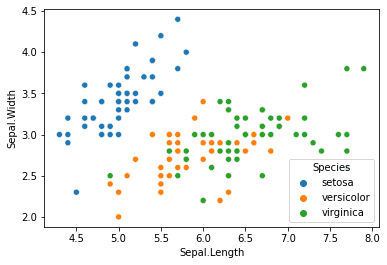

In [11]:
sns.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species')
plt.show()

### Exercise Question

Plot various combinations of columns, then comment of which one you think shows the best separation between classes of flower (subjective).

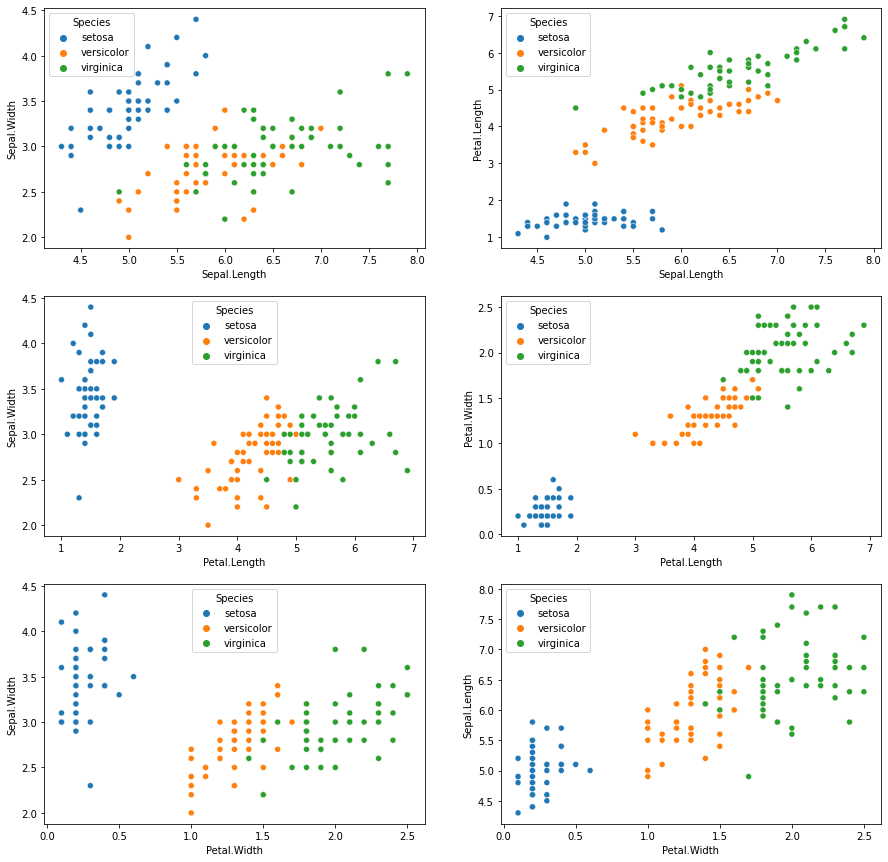

In [25]:
# Write code to plot various combinations of flower attributes that will help determine the best combination of columns:
cols = df.columns
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(15, 15))

sns.scatterplot(data = df, x = 'Sepal.Length', y = 'Sepal.Width', ax = ax[0][0], hue = "Species")
sns.scatterplot(data = df, x = 'Sepal.Length', y = 'Petal.Length', ax = ax[0][1], hue = "Species")
sns.scatterplot(data = df, x = 'Petal.Length', y = 'Petal.Width', ax = ax[1][1], hue = "Species")
sns.scatterplot(data = df, x = 'Petal.Length', y = 'Sepal.Width', ax = ax[1][0], hue = "Species")
sns.scatterplot(data = df, x = 'Petal.Width', y = 'Sepal.Length', ax = ax[2][1], hue = "Species")
sns.scatterplot(data = df, x = 'Petal.Width', y = 'Sepal.Width', ax = ax[2][0], hue = "Species")

plt.show()

Write a few sentences in the  text cell below explaining your choice.



```

```
The columns that separate each species the most upon comparison would be the petal width and sepal length columns. It appears there are really only 6 data points that could be related to either data set if we lacked the colors

## Exercise 3: What Goes In Must Come Out

### Pre-Exercise Information

Run this code to download the lady_potty.csv file.

In [3]:
# You may need to use !curl -O instead of !wget to download the data on a mac
!wget https://andrewnc.github.io/lady_potty.csv

--2023-02-05 00:36:45--  https://andrewnc.github.io/lady_potty.csv
Resolving andrewnc.github.io (andrewnc.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to andrewnc.github.io (andrewnc.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3255 (3.2K) [text/csv]
Saving to: ‘lady_potty.csv’

lady_potty.csv      100%[===================>]   3.18K  --.-KB/s    in 0s      

2023-02-05 00:36:45 (31.2 MB/s) - ‘lady_potty.csv’ saved [3255/3255]



This data comes from a friend’s cat named Lady. We recorded her bathroom trips over the course of a few weeks to see if there was a trend to her business.

It was mostly because she liked to go out multiple times per day, and we wanted to see if there was a better time for us to take her out.



### Exercise Question

Load lady_potty.csv into a pandas data frame.

All you have to do for this exercise is read in the data into a pandas dataframe, and print out the dataframe head using the following syntax:
```
dataFrame.head()
```

In [11]:
# Read in the lady_potty data file, and print out the dataframe header:
dataFrame = pd.read_csv("lady_potty.csv") 
dataFrame.head()


,ind,dt,dow,duration,pooped,peed
0,1,2020-05-23 18:55:00.0,sat,2,0,1
1,2,2020-05-23 20:30:00.0,sat,2,1,1
2,3,2020-05-23 21:25:00.0,sat,2,0,1
3,4,2020-05-24 09:38:00.0,sun,1,0,1
4,5,2020-05-24 11:01:00.0,sun,3,1,0


## Exercise 4: Litter Box

### Pre-Exercise Information

Often times in data science, you want to compare sets of data to one another. For example, you may want to compare how something changes over time.

One great way to compare these values is with a box plot. The box plot shows you how the data is distributed from the minimal values to the 75% range all the way to the maximal outlier values.

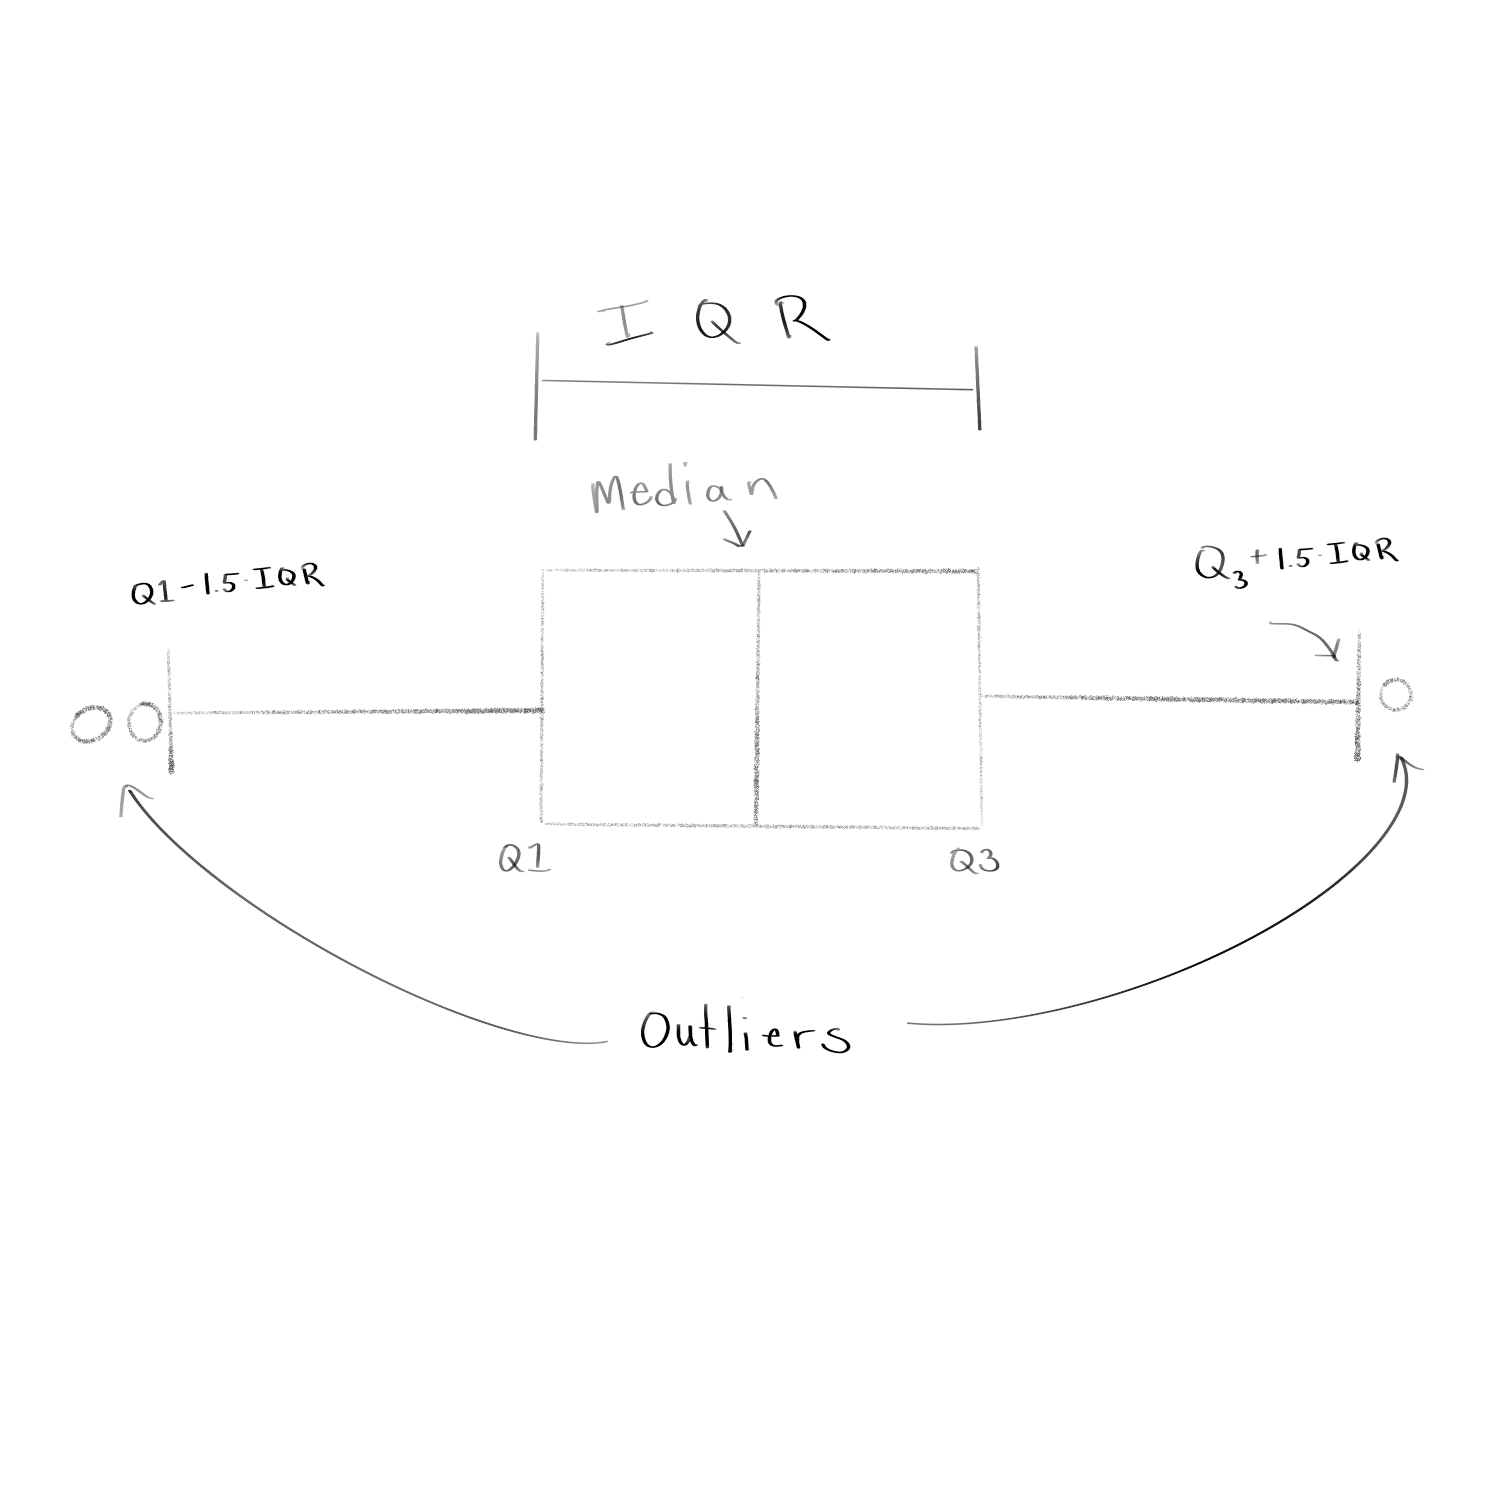

In [7]:
df = sm.datasets.get_rdataset('nhtemp').data
df.head()

,time,value
0,1912,49.9
1,1913,52.3
2,1914,49.4
3,1915,51.1
4,1916,49.4


Here we have the average yearly temperature from New Haven Connecticut from around 1910 to 1970.

A box plot is an excellent way to visualize this data over time. We first need to massage the data into a form with decades as a column. We do this by using the built in pandas cut function and choose 6 decades.

We then can generate a boxplot on a certain column.

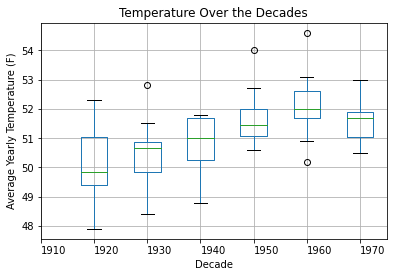

In [8]:
df['Decade'] = pd.cut(df.time, bins=6)
df[['Decade', 'value']].boxplot(by='Decade')
plt.xticks(range(7), [str(x) for x in range(1910, 1980, 10)])
plt.xticks(ha='left')
plt.title('Temperature Over the Decades')
plt.suptitle('')
plt.xlabel('Decade')
plt.ylabel('Average Yearly Temperature (F)')
plt.show()

### Exercise Question

Create a box plot for each 24 hour period to visualize the trend of Lady's potty breaks.
**[Hint: Use the data frame from the previous exercise]**

Make sure the xticks, xlabel, ylabel, and title are all tidy and well labeled.

The y-axis should be bathroom break duration, and the x-axis should be the day of the month. The plot should have a box plot for every single day.

Hint: Much of the code can be used from the temperature box plot example above.

In [12]:
# Here is a function that will split the datetime values up into month-day:
def getDay(dt):
  value = dt.split(' ')
  values = value[0].split('-')
  return '{}-{}'.format(values[1], values[2])

# This will apply the function to the datetime column and assign that to a new column:
dataFrame['day'] = dataFrame['dt'].map(getDay)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


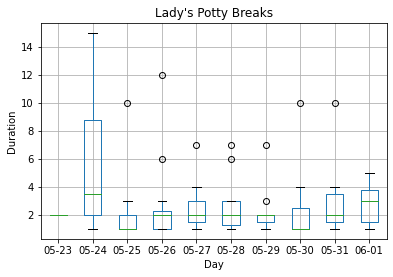

In [18]:
# Enter all of your data parsing and plotting code here. Like the hint above says, much of the temperature box plot code can be reused here:
dataFrame[['day', 'duration']].boxplot(by = 'day')
plt.title("Lady's Potty Breaks")
plt.suptitle('')
plt.xlabel("Day")
plt.ylabel("Duration")
plt.show()




## Exercise 5: Oh Shoot!

Write a few sentences about what you observe from the boxplot in the empty cell below.

Of the days displayed, 05-24 had by far the longest average duration for each potty break. The other days were are fairly similar.